In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/My Drive/Tuvoc/IMDB Dataset.csv',encoding='utf-8', engine='python')

df.head()

df.shape

(50000, 2)

In [3]:
!ls '/content/drive/My Drive'


 210280111122_Photo
 210280111122_Photo.jpg
 210280111122_sign.jpg
 210280111122_sign.pdf
'ABM India Internship Program.pdf'
'Bowling  (1).mp4'
'Bowling  (2).mp4'
'Bowling  (3).mp4'
'Bowling .mp4'
 Classroom
'Colab Notebooks'
'Completion certificate.pdf'
 DLDetailsReport_copy.pdf
'Document from 😊'
'Excel Projects'
'GUARDIAN SIGN.jpg'
'Jayswal Kunj  (1).pdf'
'Jayswal Kunj  (2).pdf'
'Jayswal kunj D..pdf'
'Jayswal Kunj .pdf'
'kd image.jpeg'
'kd sign.jpeg'
'KD SIGN.jpg'
'kunj 12 marksheet.pdf'
'kunj pdf (1).pdf'
'kunj pdf.pdf'
'kunj resume (1).pdf'
'kunj resume.pdf'
'M2 image.png'
'M2 video.mp4'
 M4.photo.png
'Overview and Basic Functions of PLC Components.pdf'
'payment pdf.jpg'
'placement fees'
'PLC CRITICAL Specifications.doc'
'PLC TECHNICALITIES & ASSOCIATED BENEFITS.doc'
 satcom8
 Screenshot_2022-02-03-10-59-03-377_com.whatsapp.jpg
 Screenshot_2024-01-24-13-52-32-295_com.android.chrome.jpg
 Tuvoc
 VID_20240319_162519.mp4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

,0
review,0
sentiment,0


<Axes: xlabel='sentiment'>

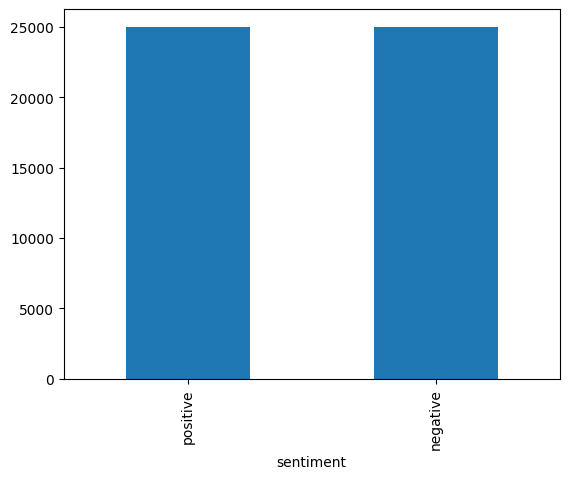

In [6]:
#quick EDA
df['sentiment'].value_counts().plot(kind='bar')

In [7]:
df['review'] [0:2]

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...


In [8]:
#lower cse
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [9]:
#remove HTML tags
import re #Regular expression

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['review'] = df['review'].apply(remove_html)
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [10]:
#remve punctuation
import string
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['review'] = df['review'].apply(remove_punc)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [11]:
df['review'] [0:5]

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [14]:
#remove stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')   # you need this line once!

stop_words = stopwords.words('english')  # load once

def remove_stopwords(text):
    clean_sentence = []

    for word in text.split():
        if word not in stop_words:
            clean_sentence.append(word)

    return ' '.join(clean_sentence)

df['clean_review'] = df['review'].apply(remove_stopwords)
df.head()
len(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


198

In [12]:
df['clean_review'] = df['review']

In [15]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
df['clean_review']

,clean_review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...
...,...
49995,i thought this movie did a down right good job...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...
49998,im going to have to disagree with the previous...


In [16]:
!pip install gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 55.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in df['review']]
df['tokenized_sentences'] = tokenized_sentences

In [18]:
print(tokenized_sentences[0:5])

[['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'methe', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'wordit', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', 'have', 

In [19]:
model = Word2Vec(
    vector_size=256,   # number of features per word
    window=5,          # context window size
    min_count=2,       # ignore words with total frequency < 2
    sg=1               # 1 = skip-gram, 0 = CBOW
)


In [20]:
model.build_vocab(tokenized_sentences)

In [21]:
#This learns numeric vectors for each word based on its context.
model.train(tokenized_sentences, total_examples=model.corpus_count, epochs=model.epochs)

(42259457, 56583220)

In [22]:
y = model.wv.index_to_key
print("Vocabulary size:", len(model.wv))
len(y)

Vocabulary size: 83329


83329

In [23]:
model.wv.vectors.shape


(83329, 256)

In [24]:


# Function to average all word vectors in a review
def get_review_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

# Apply to your dataset
df['review_vector'] = df['tokenized_sentences'].apply(lambda x: get_review_vector(x, model))
df['review_vector'][0:5]

,review_vector
0,"[-0.01009078, -0.14594537, 0.06866854, 0.10728..."
1,"[-0.035925295, -0.11551529, 0.018938554, 0.091..."
2,"[0.010988403, -0.14549612, 0.05872267, 0.09640..."
3,"[-0.023435509, -0.15929316, 0.04002169, 0.0674..."
4,"[-0.0046094344, -0.10910059, 0.02066673, 0.091..."


In [25]:
from sklearn.model_selection import train_test_split

X = np.vstack(df['review_vector'].values)
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # convert to numeric labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model1 = Sequential()

# Input layer + Hidden Layer 1
model1.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Hidden Layer 2
model1.add(Dense(16, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Output Layer
model1.add(Dense(1, activation='sigmoid'))  # binary classification

# Compile the model
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model1.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,865 (34.63 KB)

 Non-trainable params: 96 (384.00 B)

In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)


In [29]:
history = model1.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7676 - loss: 0.4833 - val_accuracy: 0.8449 - val_loss: 0.3642
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8626 - loss: 0.3348 - val_accuracy: 0.8692 - val_loss: 0.3128
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8627 - loss: 0.3270 - val_accuracy: 0.8788 - val_loss: 0.2904
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3331 - val_accuracy: 0.8781 - val_loss: 0.2908
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8612 - loss: 0.3337 - val_accuracy: 0.8815 - val_loss: 0.2868
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8700 - loss: 0.3224 - val_accuracy: 0.8645 - val_loss: 0.3234
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8651 - loss: 0.3280 - val_accuracy: 0.8533 - val_loss: 0.3305
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8658 - loss: 0.3246 - 

In [30]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8815

Confusion Matrix:
 [[4295  666]
 [ 519 4520]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [33]:
#test data Accuracy & all
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8797
Precision: 0.8789016199130778
Recall: 0.8829132764437388
F1 Score: 0.8809028809028809

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [40]:
#train data Accuracy & all
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

x_pred = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, x_pred))
print("Precision:", precision_score(y_train, x_pred))
print("Recall:", recall_score(y_train, x_pred))
print("F1 Score:", f1_score(y_train, x_pred))
print("\nClassification Report:\n", classification_report(y_train, x_pred))


Accuracy: 0.879875
Precision: 0.8772025883524142
Recall: 0.8828715996192575
F1 Score: 0.8800279643454595

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     20039
           1       0.88      0.88      0.88     19961

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



In [43]:
import numpy as np

# Assign correct model names
w2v_model = model      # Word2Vec model
classifier_model = model1   # Keras ANN

def preprocess_text(user_review):
    user_review = user_review.lower()
    tokens = user_review.split()
    return tokens

def get_review_vector(tokens, w2v_model):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)

def predict_sentiment(user_review):
    tokens = preprocess_text(user_review)
    review_vector = get_review_vector(tokens, w2v_model).reshape(1, -1)

    prediction = classifier_model.predict(review_vector)[0]

    if prediction>.8:
        print("🟢 Sentiment: Positive 😊")
        print(prediction)
    else:
        print("🔴 Sentiment: Negative 😠")
        print(prediction)

user_review = input("Enter your movie review: ")
predict_sentiment(user_review)



Enter your movie review: this movies is not good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🔴 Sentiment: Negative 😠
[0.00451501]


In [44]:
print("model =", type(model))
print("model1 =", type(model1))


model = <class 'gensim.models.word2vec.Word2Vec'>
model1 = <class 'keras.src.models.sequential.Sequential'>
